In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from PFNExperiments.LinearRegression.GenerativeModels.Curriculum import Curriculum
from PFNExperiments.LinearRegression.GenerativeModels.GenerateDataCurriculumCFM import GenerateDataCurriculumCFM
from PFNExperiments.LinearRegression.Models.Transformer_CNF import TransformerCNFConditionalDecoder
from PFNExperiments.Training.FlowMatching.CFMLossOT2 import CFMLossOT2
from PFNExperiments.LatentFactorModels.Training.TrainerCurriculumCNF_LatentFactor import TrainerCurriculumCNF_LatentFactor
import torch
from torch.optim.lr_scheduler import ReduceLROnPlateau, OneCycleLR
from PFNExperiments.LinearRegression.Models.ModelToPosteriorCNF import ModelToPosteriorCNF
from PFNExperiments.LatentFactorModels.ComparisonModels.Hamiltionian_MC import Hamiltionian_MC
from PFNExperiments.Evaluation.Evaluate import Evaluate, results_dict_to_data_x_tuple, result_dict_to_latent_variable_convert_mu_sigma_to_beta, results_dict_to_data_x_tuple_transpose

In [4]:
from PFNExperiments.LatentFactorModels.GenerativeModels.Clustering.GMMs import make_gmm_program_diagonal_global, make_gmm_program_diagonal_batched
from PFNExperiments.LatentFactorModels.GenerativeModels.LatenFactorModel_abstract import return_only_x

from PFNExperiments.LatentFactorModels.ComparisonModels.MakeDefaultListComparison import make_default_list_comparison, make_reduced_list_comparison


In [7]:
make_gmm_program_diagonal_global(globals_=globals())

<function PFNExperiments.LatentFactorModels.GenerativeModels.Clustering.GMMs.make_gmm_program_diagonal_global.<locals>.gmm_program(x: <built-in method tensor of type object at 0x00007FFD67E529D0> = None, p=5, k=3, n=100) -> dict>

In [4]:
N = 50
P = 5
K = 3
BATCH_SIZE = 32
N_EPOCHS = 1
N_SAMPLES_PER_EPOCH = 1000
N_BATCHES_PER_EPOCH = N_SAMPLES_PER_EPOCH//BATCH_SIZE

In [5]:
curriculum = Curriculum(max_iter=int(N_EPOCHS*N_BATCHES_PER_EPOCH*BATCH_SIZE*0.5))
curriculum.add_param_list([
    ("n", curriculum.constant_scheduler(N)),
    ("p", curriculum.constant_scheduler(P)),
    ("k", curriculum.constant_scheduler(K)),
    ("batch_size", curriculum.constant_scheduler(BATCH_SIZE)),
    ("a1", curriculum.constant_scheduler(5.0)),
    ("b1", curriculum.constant_scheduler(2.0)),
    ("dirichlet_beta", curriculum.constant_scheduler(0.5)),
    ("lambda1", curriculum.constant_scheduler(5.0))
])
#curriculum.plot_all_schedules()

In [6]:
data_generator = GenerateDataCurriculumCFM(
    pprogram_maker= make_gmm_program_diagonal_batched,
    curriculum= curriculum,
)

pprogram_covariates_train is None, using pprogram_covariates instead
pprogram_covariates_val is None, using pprogram_covariates instead
pprogram_covariates_test is None, using pprogram_covariates instead


In [7]:
epoch_loader = data_generator.make_epoch_loader(
    n = N,
    p = P,
    number_of_batches_per_epoch = N_BATCHES_PER_EPOCH,
    n_epochs = N_EPOCHS,
    batch_size= BATCH_SIZE,
    train_frac= 0.5,
    val_frac= 0.1,
    shuffle=False,
    n_samples_to_generate_at_once = 250_000
    )

The number of batches times the number of epochs must be equal to the total number of iterations in the curriculum. But got 992 and 496 respectively


In [8]:
sample_batch = next(iter(epoch_loader[0][0]))

In [9]:
for key, value in sample_batch.items():
    print(key, value.shape)

phi torch.Size([32, 3])
mu torch.Size([32, 15])
sigma_squared torch.Size([32, 15])
z torch.Size([32, 50])
x torch.Size([32, 50, 5])
beta torch.Size([32, 30])
time torch.Size([32])
base_sample_beta torch.Size([32, 30])


####################################################################################################
Epoch 0


100%|██████████| 1/1 [00:01<00:00,  1.95s/it]


{'X': {'mean': tensor(0.0793), 'variance': tensor(9.1332), 'min': tensor(-33.6918), 'max': tensor(33.6757), 'mean_mean': tensor([-0.0386,  0.2821,  0.1512, -0.0045,  0.0062]), 'variance_mean': tensor([4.6336, 3.7097, 3.1612, 4.2213, 3.5781]), 'min_mean': None, 'max_mean': None}, 'beta': {'mean': tensor(0.2597), 'variance': tensor(4.5540), 'min': tensor(-32.1808), 'max': tensor(30.8286), 'mean_mean': tensor(0.2597), 'variance_mean': tensor(4.6105), 'min_mean': None, 'max_mean': None}}
Statistics for phi:
Mean: tensor([0.3533, 0.3326, 0.3141])
Variance: tensor([0.0966, 0.0915, 0.0865])
Min: tensor([1.1355e-05, 1.4919e-05, 4.7523e-07])
Max: tensor([0.9937, 0.9995, 0.9962])
Mean of means: 0.333333283662796
Mean of variances: 0.13713303208351135
Mean of minimums: None
Mean of maximums: None


Statistics for mu:
Mean: tensor([-0.1178,  0.1796,  0.2793,  0.0878, -0.0953, -0.2519,  0.2489, -0.2586,
        -0.1014,  0.0281,  0.0907,  0.1645,  0.1278, -0.0813, -0.0278])
Variance: tensor([ 8.140

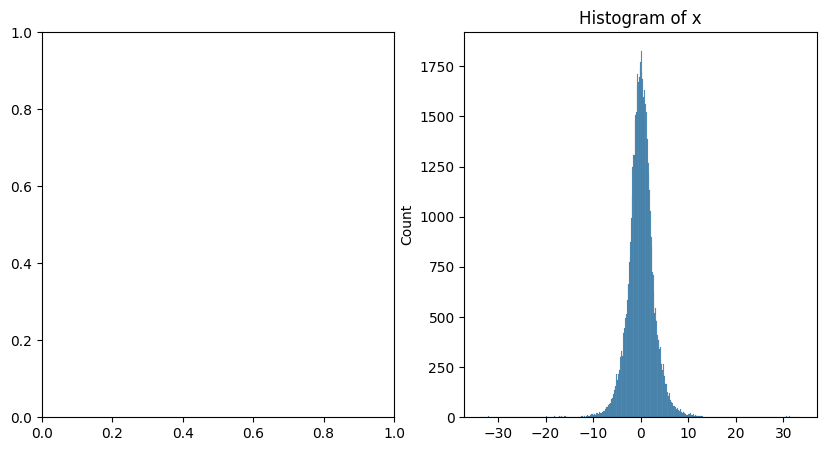

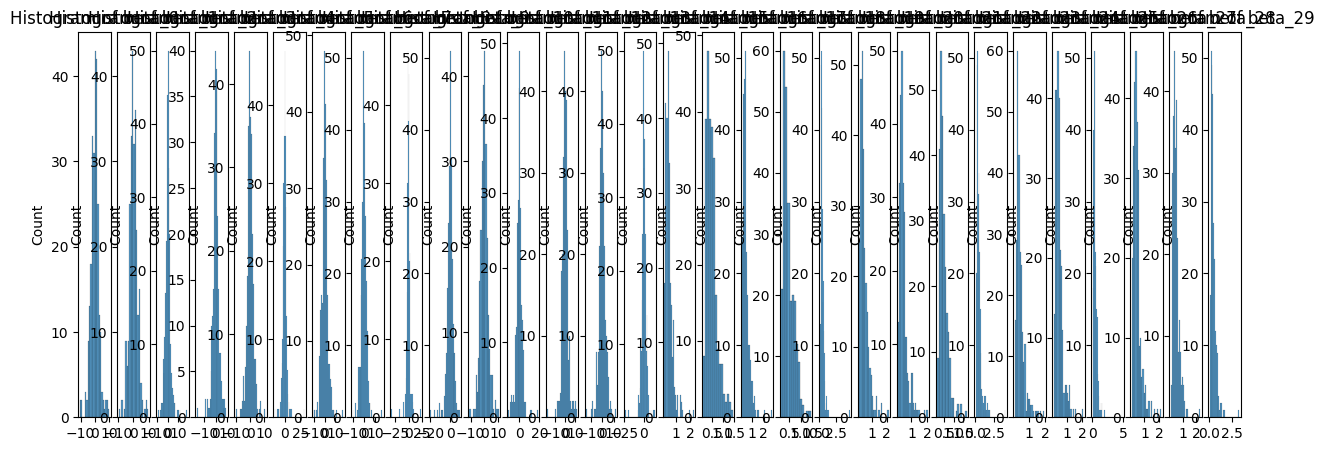

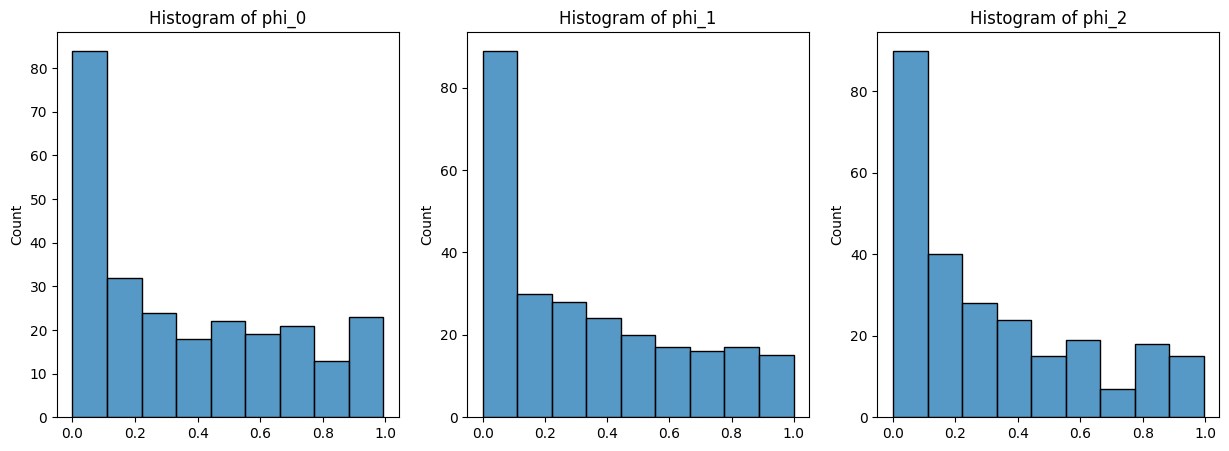

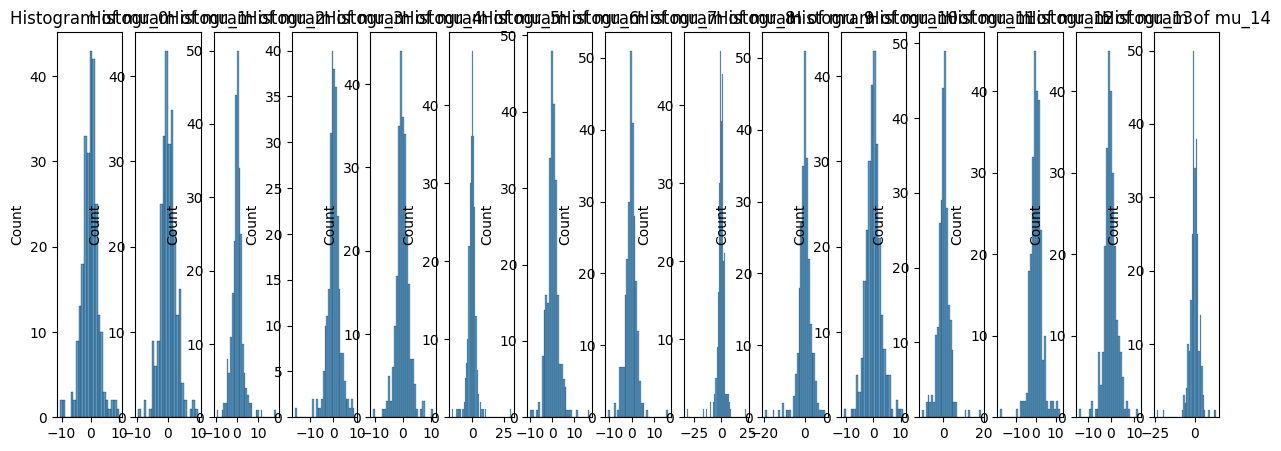

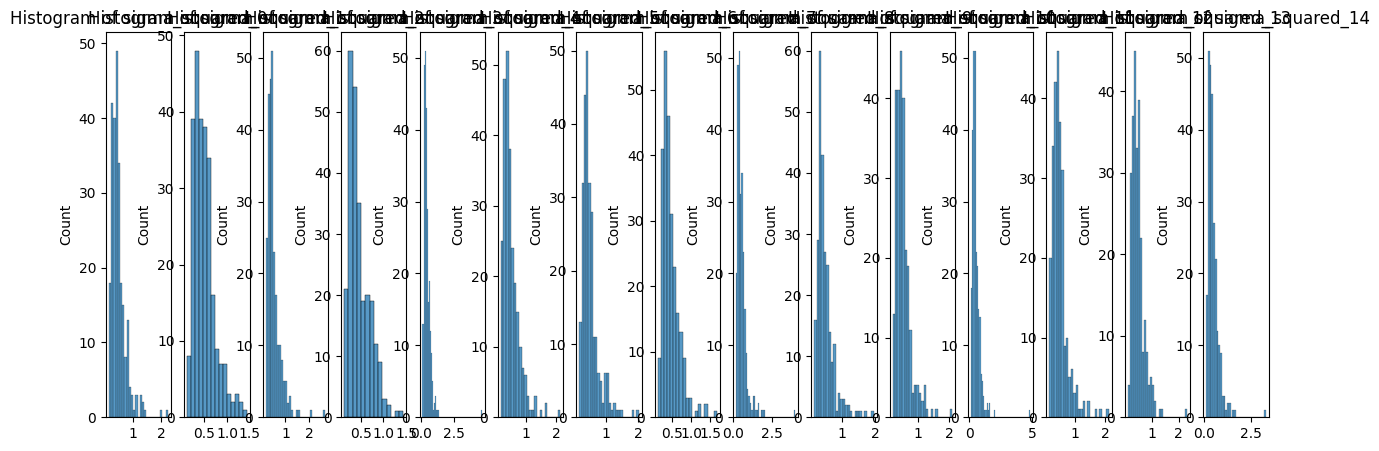

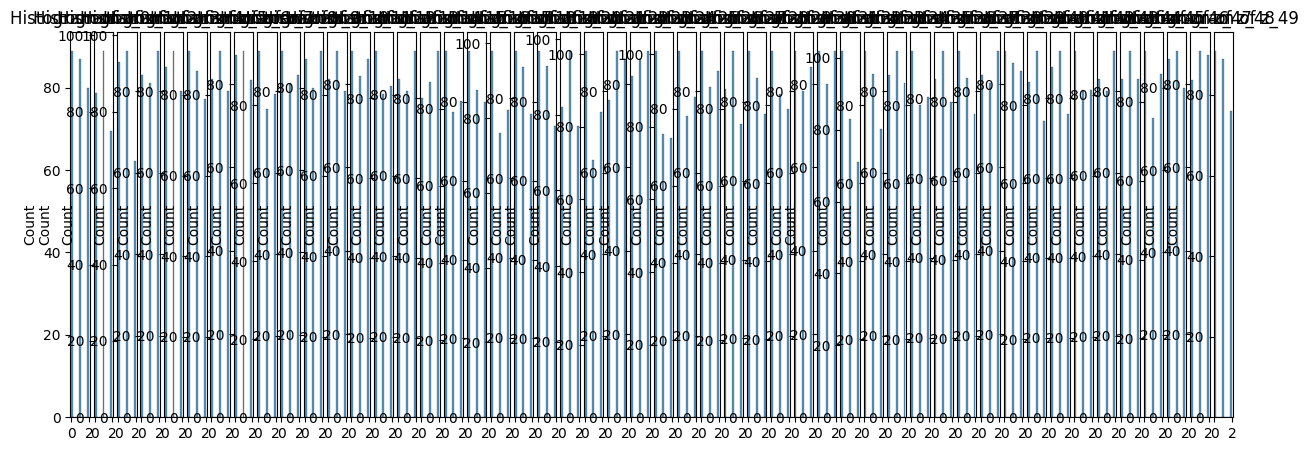

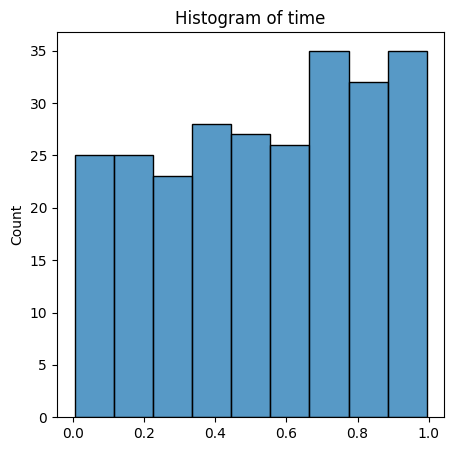

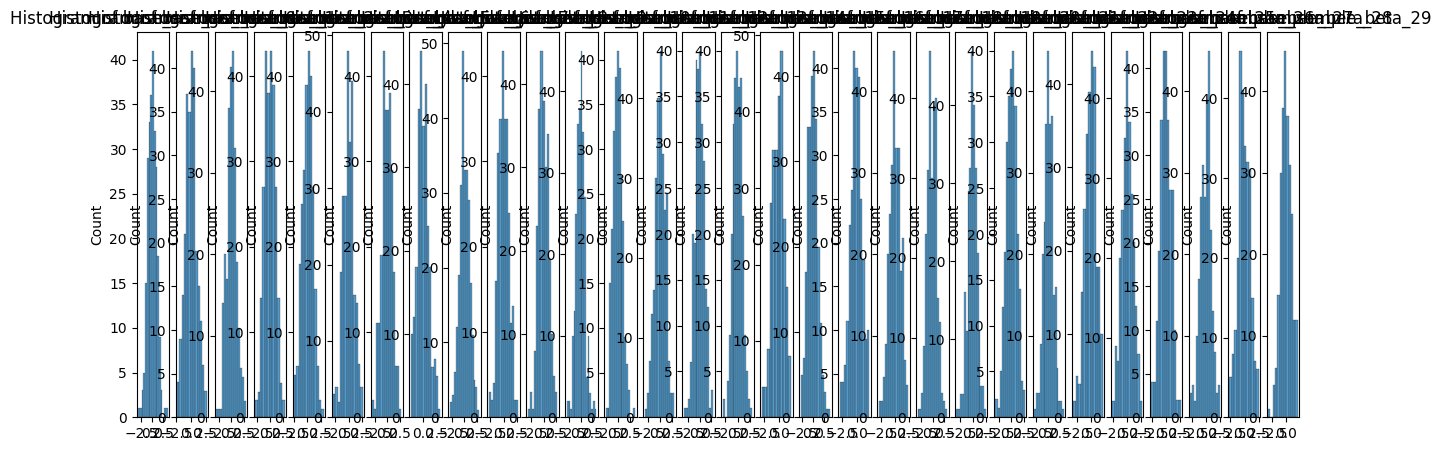

####################################################################################################
Epoch 0


100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


{'X': {'mean': tensor(-0.0721), 'variance': tensor(7.4622), 'min': tensor(-23.4434), 'max': tensor(20.3867), 'mean_mean': tensor([ 0.0503, -0.2673, -0.1321,  0.0802, -0.0915]), 'variance_mean': tensor([3.0904, 3.3694, 3.8493, 4.1654, 4.1149]), 'min_mean': None, 'max_mean': None}, 'beta': {'mean': tensor(0.2667), 'variance': tensor(3.7455), 'min': tensor(-21.1317), 'max': tensor(18.3980), 'mean_mean': tensor(0.2667), 'variance_mean': tensor(3.8145), 'min_mean': None, 'max_mean': None}}
Statistics for phi:
Mean: tensor([0.3369, 0.3129, 0.3503])
Variance: tensor([0.0898, 0.0757, 0.0923])
Min: tensor([2.2249e-07, 6.8041e-06, 1.3435e-07])
Max: tensor([0.9976, 0.9911, 0.9955])
Mean of means: 0.333333283662796
Mean of variances: 0.12876607477664948
Mean of minimums: None
Mean of maximums: None


Statistics for mu:
Mean: tensor([ 0.1875,  0.1748,  0.1815, -0.0856, -0.0636, -0.0065, -0.0232, -0.1665,
         0.0431,  0.0592,  0.3889, -0.2456, -0.1802,  0.1790,  0.0729])
Variance: tensor([ 7.15

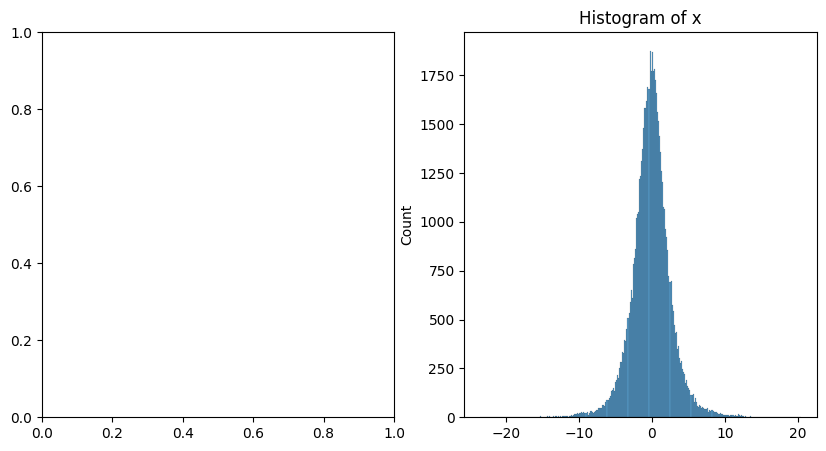

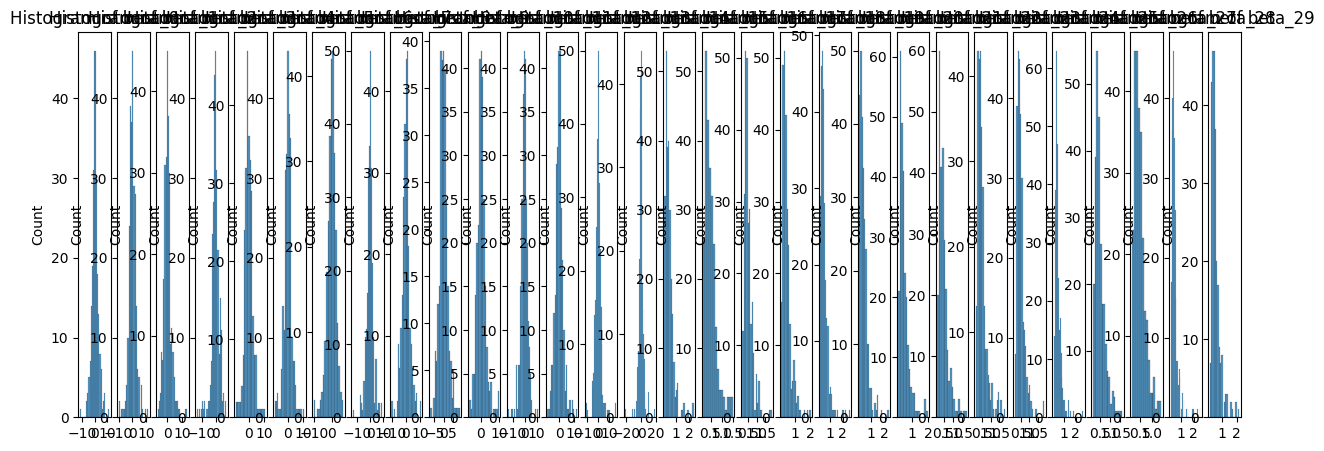

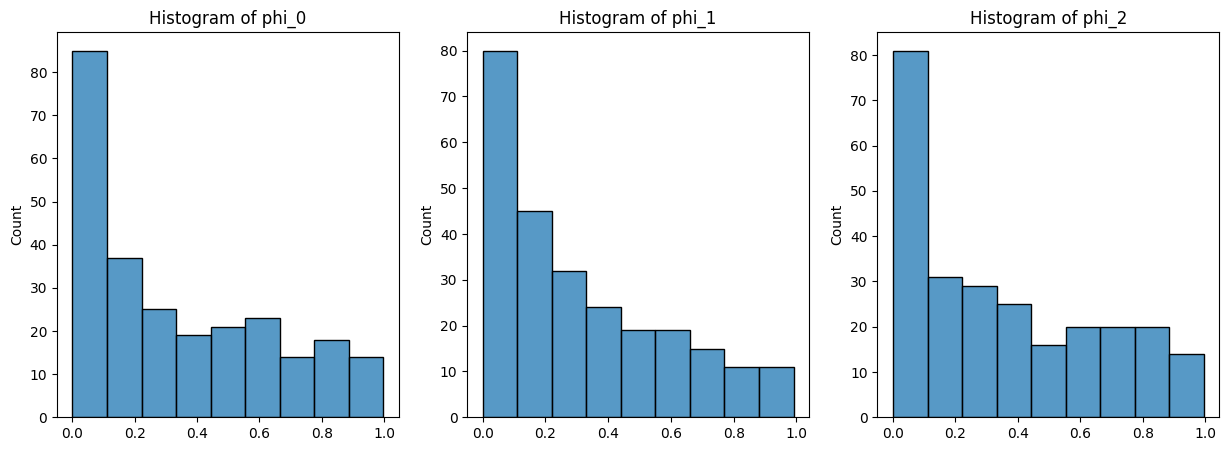

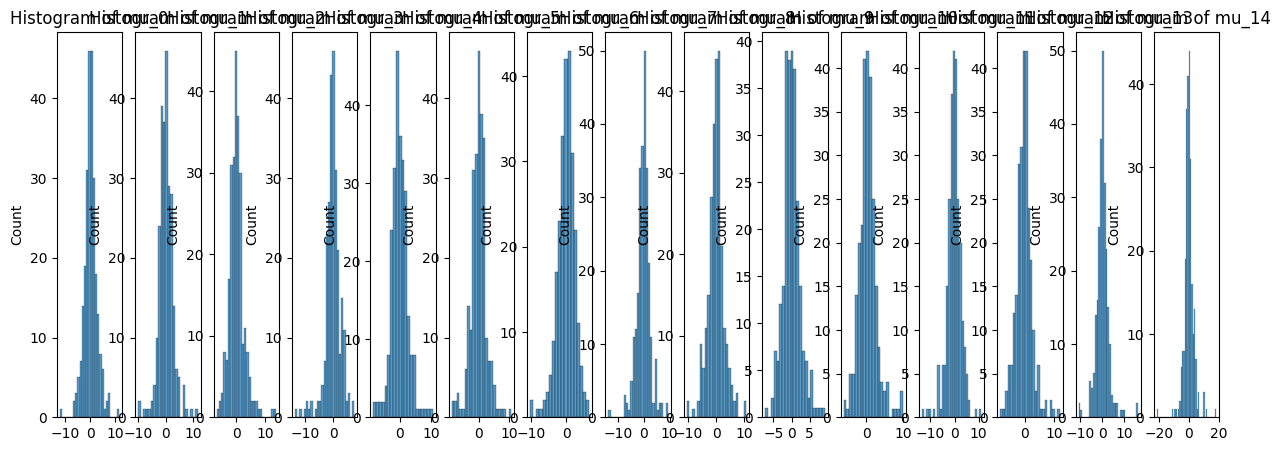

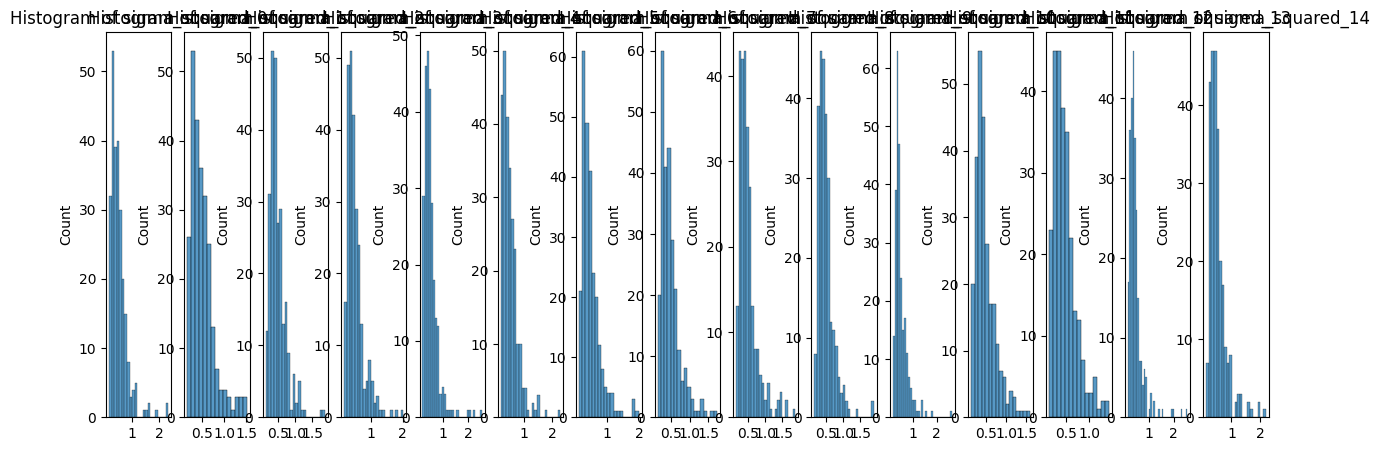

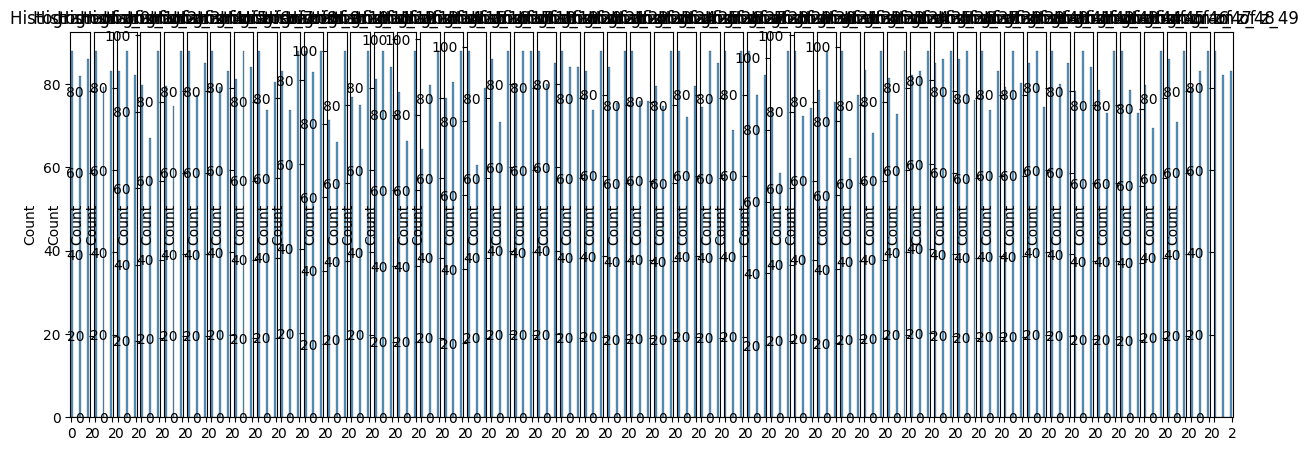

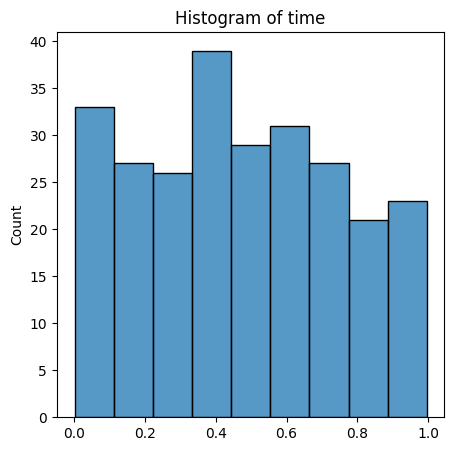

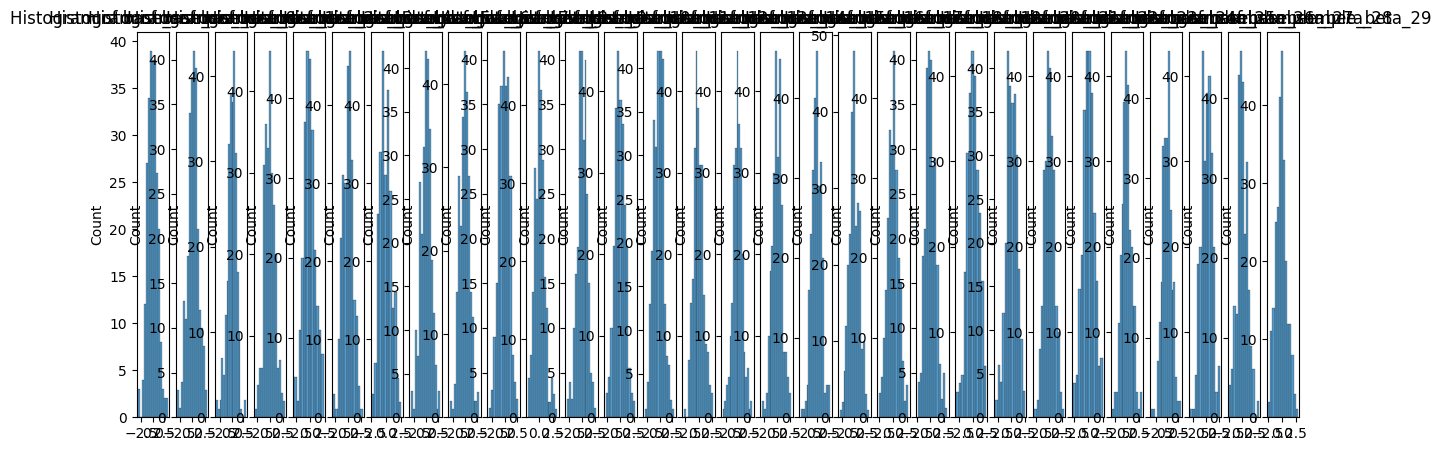

[{'X': {'mean': tensor(0.0793),
   'variance': tensor(9.1332),
   'min': tensor(-33.6918),
   'max': tensor(33.6757),
   'mean_mean': tensor([-0.0386,  0.2821,  0.1512, -0.0045,  0.0062]),
   'variance_mean': tensor([4.6336, 3.7097, 3.1612, 4.2213, 3.5781]),
   'min_mean': None,
   'max_mean': None},
  'beta': {'mean': tensor(0.2597),
   'variance': tensor(4.5540),
   'min': tensor(-32.1808),
   'max': tensor(30.8286),
   'mean_mean': tensor(0.2597),
   'variance_mean': tensor(4.6105),
   'min_mean': None,
   'max_mean': None}},
 {'X': {'mean': tensor(-0.0721),
   'variance': tensor(7.4622),
   'min': tensor(-23.4434),
   'max': tensor(20.3867),
   'mean_mean': tensor([ 0.0503, -0.2673, -0.1321,  0.0802, -0.0915]),
   'variance_mean': tensor([3.0904, 3.3694, 3.8493, 4.1654, 4.1149]),
   'min_mean': None,
   'max_mean': None},
  'beta': {'mean': tensor(0.2667),
   'variance': tensor(3.7455),
   'min': tensor(-21.1317),
   'max': tensor(18.3980),
   'mean_mean': tensor(0.2667),
   'varia

In [10]:
data_generator.check_model(
    n_samples_per_epoch=N_SAMPLES_PER_EPOCH,
    epochs_to_check = [0, N_EPOCHS-1],
    p = P,
    n = N,
    used_batch_samples = 1
)

In [10]:
epoch_loader = data_generator.make_epoch_loader(
    n = N,
    p = P,
    number_of_batches_per_epoch = N_BATCHES_PER_EPOCH,
    n_epochs = N_EPOCHS,
    batch_size= BATCH_SIZE,
    train_frac= 0.5,
    val_frac= 0.1,
    shuffle=False,
    n_samples_to_generate_at_once = 250_000
)

The number of batches times the number of epochs must be equal to the total number of iterations in the curriculum. But got 992 and 496 respectively


In [11]:
sample_batch = next(iter(epoch_loader[0][0]))
sample_batch.keys()

dict_keys(['phi', 'mu', 'sigma_squared', 'z', 'x', 'beta', 'time', 'base_sample_beta'])

In [12]:
sample_batch["x"].shape, sample_batch["beta"].shape

(torch.Size([32, 50, 5]), torch.Size([32, 30]))

In [13]:
2*K

6

In [14]:
"""
model = TransformerCNFConditionalDecoder(
    n_input_features_encoder = 1,
    n_input_features_decoder = 2*P,
    d_model_encoder = 512,
    d_model_decoder = 512,
    n_heads_encoder = 8,
    n_heads_decoder = 8,
    d_ff_encoder = 1024,
    d_ff_decoder = 1024,
    dropout_encoder = 0.1,
    dropout_decoder = 0.1,
    n_conditional_input_features =  1,
    n_condition_features = 512,
    n_layers_condition_embedding = 3,
    n_layers_encoder = 8,
    n_layers_decoder = 6,
    use_positional_encoding_encoder = True,
    use_positional_encoding_decoder = False,
    use_self_attention_decoder = False,
    output_dim = 2*P,
    d_final_processing = 512,
    n_final_layers = 3,
    dropout_final = 0.1,
    treat_z_as_sequence = False,
)
"""

model = TransformerCNFConditionalDecoder(
    n_input_features_encoder = P,
    n_input_features_decoder = 2*P*K,
    d_model_encoder = 16,
    d_model_decoder = 16,
    n_heads_encoder = 1,
    n_heads_decoder = 1,
    d_ff_encoder = 16,
    d_ff_decoder = 16,
    dropout_encoder = 0.1,
    dropout_decoder = 0.1,
    n_conditional_input_features =  1,
    n_condition_features = 16,
    n_layers_condition_embedding = 3,
    n_layers_encoder = 8,
    n_layers_decoder = 6,
    use_positional_encoding_encoder = True,
    use_positional_encoding_decoder = False,
    use_self_attention_decoder = False,
    output_dim = 2*P*K,
    d_final_processing = 16,
    n_final_layers = 3,
    dropout_final = 0.1,
    treat_z_as_sequence = False,
)

In [15]:
loss_fun = CFMLossOT2(
    sigma_min=1e-4
)

In [16]:
opt = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = OneCycleLR(opt,
                       max_lr = 5e-4,
                       epochs = N_EPOCHS,
                       steps_per_epoch = N_SAMPLES_PER_EPOCH//BATCH_SIZE,
                       pct_start = 0.1,
                       div_factor=25.0,
                       final_div_factor=1e4)

#scheduler = ReduceLROnPlateau(opt)

additional_evals = {
}



In [17]:
trainer = TrainerCurriculumCNF_LatentFactor(
    model = model,
    optimizer=opt,
    scheduler = scheduler,
    loss_function=loss_fun,
    epoch_loader = epoch_loader,
    evaluation_functions= additional_evals,
    n_epochs = N_EPOCHS,
    early_stopping_patience = 200,
    schedule_step_on = "batch",
    save_path = None,
    coupling = None,
    use_same_timestep_per_batch = False,
    use_train_mode_during_validation = False,
    max_gradient_norm = 1.0

)

In [18]:
trainer.validate()

100%|██████████| 4/4 [00:37<00:00,  9.30s/it]


{'loss_mean': 5.369440078735352,
 'loss_median': 4.904667377471924,
 'loss_std': 0.5897909998893738}

In [19]:
r = trainer.train()

Curriculum parameters: {'n': 50, 'p': 5, 'k': 3, 'batch_size': 32, 'a1': 5.0, 'b1': 2.0, 'dirichlet_beta': 0.5, 'lambda1': 5.0} at iteration 0


100%|██████████| 4/4 [00:46<00:00, 11.71s/it]


Epoch 0:
Training: {'loss_mean': 5.551546573638916, 'loss_median': 5.341975212097168, 'loss_std': 0.6765956878662109}
Validation: {'loss_mean': 5.00663948059082, 'loss_median': 4.804994583129883, 'loss_std': 0.4457390010356903}
Validation curriculum: {'loss_mean': 4.8125691413879395, 'loss_median': 4.2453694343566895, 'loss_std': 1.2099273204803467}
Time: 79.77415633201599
Learning rate: [0.0002514085105243268]


----------------------------------------------------------------------------------------------------
Saving model


100%|██████████| 13/13 [00:39<00:00,  3.02s/it]

Test: {'loss_mean': 5.659067630767822, 'loss_median': 5.254441261291504, 'loss_std': 1.618674874305725}


In [20]:
full_model = ModelToPosteriorCNF(
    model = model.eval(),
    sample_name = "beta",
    sample_shape = (2*P*K,),
    n_samples=1000,
    batch_size = BATCH_SIZE,
    solve_adjoint = True,
    atol = 10,
    rtol = 10,
    #device = torch.device("cpu")
)

benchmark_params_ppgrogram = data_generator.curriculum.get_params(-1)
del benchmark_params_ppgrogram["batch_size"]
print(f"params for pprogram: {benchmark_params_ppgrogram}")

pprogram1 = make_gmm_program_diagonal(**benchmark_params_ppgrogram)

pprogram1_x = return_only_x(pprogram1)



params for pprogram: {'n': 50, 'p': 5, 'k': 3, 'a1': 5.0, 'b1': 2.0, 'dirichlet_beta': 0.5, 'lambda1': 5.0}


In [21]:
test_batch = next(iter(epoch_loader[0][1]))
x_test = test_batch["x"]

In [22]:
x_test.shape

torch.Size([32, 50, 5])

In [23]:
#samples = full_model.sample_posterior(x_test[0])

In [24]:
#samples["beta"].shape

In [25]:
pprogram1

<function PFNExperiments.LatentFactorModels.GenerativeModels.Clustering.GMMs.make_gmm_program_diagonal.<locals>.gmm_program(x: <built-in method tensor of type object at 0x00007FFD4DE729D0> = None, p=5, k=3, n=50) -> dict>

In [77]:
make_gmm_program_diagonal

<function PFNExperiments.LatentFactorModels.GenerativeModels.Clustering.GMMs.make_gmm_program_diagonal(n: int = 100, p: int = 5, k: int = 3, a1: float = 5.0, b1: float = 2.0, dirichlet_beta: float = 1.0, lambda1: float = 3.0)>

In [80]:
globals()["pprogram_global"] = make_gmm_program_diagonal(**benchmark_params_ppgrogram)
    

In [88]:
hmc = Hamiltionian_MC(
    pprogram=pprogram_class_wrap,
    n_samples=100,
    n_warmup=100,
    mcmc_kwargs={
        "num_chains":2
    }
)

#models = make_default_list_comparison(pprogram= pprogram1_x, n_samples= 500)

Warmup [1]:   0%|          | 0/200 [00:00, ?it/s]

Warmup [2]:   0%|          | 0/200 [00:00, ?it/s]

In [89]:
"""
evaluation = Evaluate(
    posterior_model = models[1],
    evaluation_loader = trainer.testset,
    comparison_models= [hmc],
    n_evaluation_cases=2,
    save_path= None,
    overwrite_results = True,
    results_dict_to_data_for_model = results_dict_to_data_x_tuple,
    results_dict_to_latent_variable_comparison_models= result_dict_to_latent_variable_convert_mu_sigma_to_beta,
    result_dict_to_data_for_comparison_models= results_dict_to_data_x_tuple
)
"""

evaluation = Evaluate(
    posterior_model = hmc,
    evaluation_loader = trainer.testset,
    comparison_models= [],
    n_evaluation_cases=2,
    save_path= None,
    overwrite_results = True,
    results_dict_to_data_for_model = results_dict_to_data_x_tuple,
    results_dict_to_latent_variable_posterior_model = result_dict_to_latent_variable_convert_mu_sigma_to_beta,
    results_dict_to_latent_variable_comparison_models= result_dict_to_latent_variable_convert_mu_sigma_to_beta,
    result_dict_to_data_for_comparison_models= results_dict_to_data_x_tuple
)

In [90]:
evaluation.run_evaluation()


Sampling posterior:   0%|          | 0/2 [00:00<?, ?it/s]


AttributeError: Can't pickle local object 'make_gmm_program_diagonal.<locals>.gmm_program'

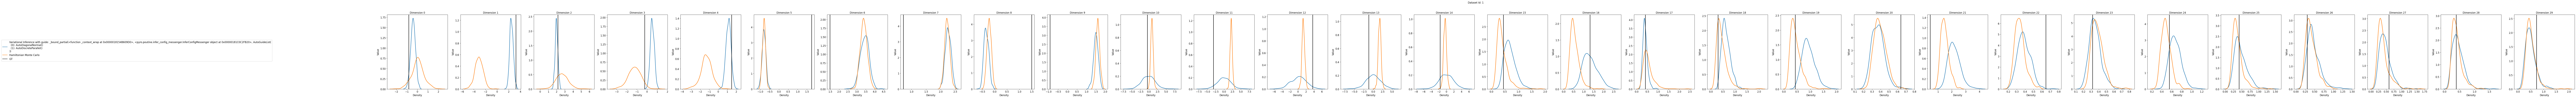

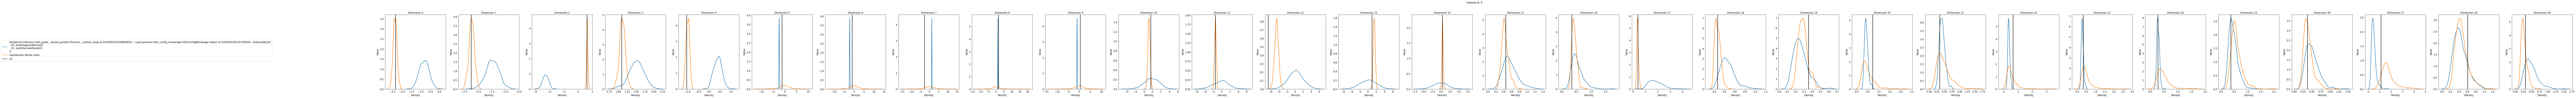

In [34]:
evaluation.plot_results()

In [35]:
from PFNExperiments.Evaluation.RealWorldEvaluation.PreprocessDataset import Preprocessor, PreprocessorClassification

In [36]:
from PFNExperiments.Evaluation.RealWorldEvaluation.Preprocess_multivariate_GMM import Preprocessor_GMM_multivariate
from PFNExperiments.Evaluation.RealWorldEvaluation.GetDataOpenML import GetDataOpenML
getdata = GetDataOpenML(
    preprocessor = Preprocessor_GMM_multivariate(
        N_datapoints = N,
        P_features = P,
        x_mean = 0.0,
        x_var = 1.0,
    ),
    save_path = "C:/Users/arik_/Documents/Dokumente/Job_Clausthal/PFNs/Repository/PFNExperiments/Evaluation/RealWorldEvaluation/DatasetsOpenML/Tabular_benchmark_numerical_regression.pkl",
    benchmark_id = 336
)
datasets = getdata.get_data()

In [37]:
comparison_models = make_default_list_comparison(pprogram= pprogram1_x, n_samples= 1000)

In [38]:
from PFNExperiments.Evaluation.RealWorldEvaluation.EvaluateRealWorld import EvaluateRealWorld


eval = EvaluateRealWorld(
    
    posterior_model = full_model,
    evaluation_datasets = datasets,
    comparison_models = comparison_models[1:3],
    n_evaluation_cases = 2,
    results_dict_to_data_for_model = results_dict_to_data_x_tuple,
    results_dict_to_latent_variable_comparison_models= result_dict_to_latent_variable_convert_mu_sigma_to_beta,
    result_dict_to_data_for_comparison_models= results_dict_to_data_x_tuple
)

In [39]:
eval.run_evaluation()

Sampling posterior:   0%|          | 0/2 [00:00<?, ?it/s]

....................


Sampling posterior:  50%|█████     | 1/2 [02:29<02:29, 149.09s/it]

....................


Sampling posterior:   0%|          | 0/2 [00:00<?, ?it/s]

....................


Sampling posterior:  50%|█████     | 1/2 [02:47<02:47, 167.55s/it]

....................


Sampling posterior: 100%|██████████| 2/2 [05:27<00:00, 163.62s/it]


Comparison to ground truth:

Summarized results:

Comparison among models:

Summarized results:


,Model 1,Model 2,Mean_Wasserstein_distance with metric euclidean,Mean_MMD,Mean_cst_roc_auc,Std_Wasserstein_distance with metric euclidean,Std_MMD,Std_cst_roc_auc
0,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,10.575329,3.965482,1.0,0.124732,0.167943,0.0
1,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,9.419564,3.604070,1.0,0.053669,0.132949,0.0
2,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,6.791085,5.342443,1.0,0.161377,0.561083,0.0


P-values:


,Pair 1: Model A,Pair 1: Model B,Pair 2: Model A,Pair 2: Model B,Wasserstein_distance with metric euclidean_p-value,MMD_p-value,cst_roc_auc_p-value
0,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,0.245278,0.245278,1.0
1,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,0.245278,0.245278,1.0
2,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,0.245278,0.245278,1.0


{'summarized_results': {'model_comparison_among_each_other':                                              Model 1  \
  0  <PFNExperiments.LinearRegression.Models.ModelT...   
  1  <PFNExperiments.LinearRegression.Models.ModelT...   
  2  Variational Inference with guide: _bound_parti...   
  
                                               Model 2  \
  0  Variational Inference with guide: _bound_parti...   
  1  Variational Inference with guide: _bound_parti...   
  2  Variational Inference with guide: _bound_parti...   
  
     Mean_Wasserstein_distance with metric euclidean  Mean_MMD  \
  0                                        10.575329  3.965482   
  1                                         9.419564  3.604070   
  2                                         6.791085  5.342443   
  
     Mean_cst_roc_auc  Std_Wasserstein_distance with metric euclidean   Std_MMD  \
  0               1.0                                        0.124732  0.167943   
  1               1.0                 